In [38]:
import requests
import pandas as pd
import torch

In [39]:
base_payload = {
    'api_key' : '968e8294c4b39431414e4a19ee3bb222',
    'query' : 'aapl site:theguardian.com',
    'time_period': '1D'  # Restricts the results to the last 24 hours
}

# Function to fetch articles for a given payload
def fetch_articles(payload):
    response = requests.get('https://api.scraperapi.com/structured/google/news', params=payload)
    data = response.json()
    return data

# Fetch the initial page to start with
data = fetch_articles(base_payload)

In [40]:
# Initialize a list to hold all articles from the first 4 pages
all_articles = []

# Add articles from the first page to the all_articles list
all_articles.extend(data['articles'])

In [41]:
# The number of pages we want to scrape
pages_to_scrape = 4

# Iterate over the pagination URLs for the next 3 pages and fetch articles
for page in range(2, pages_to_scrape + 1):
    # Check if the pagination data has the URL for the next page
    if page <= len(data['pagination']['pages']):
        # Construct the next page URL from the pagination data
        next_page_url = data['pagination']['pages'][page - 2]['url']
        
        # Extract the 'start' parameter from the next page URL to use in the next payload
        start_param = next_page_url.split('&start=')[1].split('&')[0]
        
        # Update the payload with the new 'start' parameter
        next_payload = base_payload.copy()
        next_payload['start'] = start_param
        
        # Fetch the articles from the next page
        next_page_data = fetch_articles(next_payload)
        
        # Add the articles from this page to the all_articles list
        all_articles.extend(next_page_data['articles'])


In [42]:
len(all_articles)

40

[{'source': 'Yahoo Finance',
  'thumbnail': '',
  'title': 'Warren Buffett-Led Berkshire Hathaway Sells Some Apple Stock. Should You?',
  'description': "On Feb. 14, Berkshire Hathaway (NYSE: BRK.A) (NYSE: BRK.B) filed its 13F \nreport for the period ended Dec. 31, 2023. There weren't too many sizable \nmoves,...",
  'date': '21 hours ago',
  'link': 'https://finance.yahoo.com/news/warren-buffett-led-berkshire-hathaway-163000891.html'},
 {'source': 'Yahoo Finance UK',
  'thumbnail': '',
  'title': 'Trending tickers: Apple, Ethereum, Santander and Currys',
  'description': 'The latest investor updates on stocks that are trending on Monday.',
  'date': '3 hours ago',
  'link': 'https://uk.finance.yahoo.com/news/apple-ethereum-santander-currys-trending-tickers-101849005.html'},
 {'source': 'Bloomberg.com',
  'thumbnail': '',
  'title': 'Apple Set to Face Near €500 Million EU Fine in Spotify Row',
  'description': "Apple Inc. will face a European Union fine close to €500 million ($539 \nmi
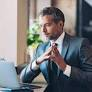
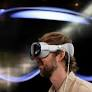
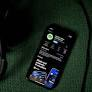
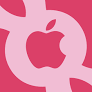
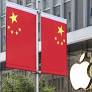

In [43]:
data['articles']

In [44]:
df = pd.DataFrame(all_articles)
df.to_json('djia_tweets.json', orient='index')

In [45]:
df

,source,thumbnail,title,description,date,link
0,Yahoo Finance,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",Warren Buffett-Led Berkshire Hathaway Sells So...,"On Feb. 14, Berkshire Hathaway (NYSE: BRK.A) (...",21 hours ago,https://finance.yahoo.com/news/warren-buffett-...
1,Yahoo Finance UK,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","Trending tickers: Apple, Ethereum, Santander a...",The latest investor updates on stocks that are...,3 hours ago,https://uk.finance.yahoo.com/news/apple-ethere...
2,Bloomberg.com,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",Apple Set to Face Near €500 Million EU Fine in...,Apple Inc. will face a European Union fine clo...,21 hours ago,https://www.bloomberg.com/news/articles/2024-0...
3,CNBC,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",EU reportedly set to fine Apple 500 million eu...,The European Commission is set to fine Apple a...,8 hours ago,https://www.cnbc.com/2024/02/19/eu-set-to-fine...
4,Yahoo Finance,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",There Are 2.2 Billion Reasons to Buy Apple Sto...,"30), Apple (NASDAQ: AAPL) was finally able to ...",22 hours ago,https://finance.yahoo.com/news/2-2-billion-rea...
5,Bloomberg.com,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","Apple Vision Pro: Returning $3,500 Device Over...",The Apple Vision Pro has now been available fo...,23 hours ago,https://www.bloomberg.com/news/newsletters/202...
6,Reuters,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",EU poised to fine Apple about 500 million euro...,The European Union is set to fine Apple about ...,22 hours ago,https://www.reuters.com/technology/eu-fine-app...
7,The Verge,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",Apple will reportedly face a $539 million fine...,A Sunday morning report from the Financial Tim...,21 hours ago,https://www.theverge.com/2024/2/18/24076526/ap...
8,Fortune,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",EU to slap Apple with €500 million fine in cul...,The penalty would be the first of its kind by ...,21 hours ago,https://fortune.com/2024/02/18/eu-apple-fine-a...
9,Seeking Alpha,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",Apple Still Has A China Problem (NASDAQ:AAPL),Apple's release of the Vision Pro headset and ...,20 hours ago,https://seekingalpha.com/article/4671203-apple...


In [46]:
vader = SentimentIntensityAnalyzer()
print(vader.polarity_scores("Apple Vision Pro: Returning $3,500 Device Over"))

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
tokens = tokenizer.encode('Microsoft $MSFT blazed the trail for tech when Windows and Internet Explorer emerged as critical tools of the web revolution 30 years ago. Now, the tech behemoth is eyeing a leadership role in the latest hot technology trend: AI.', return_tensors='pt')


In [ ]:
result = model(tokens)

In [ ]:
torch.argmax(result.logits)

tensor(4)

In [1]:

import torch
print(torch.cuda.is_available())

False
